In [1]:
import pandas as pd

from tj_hyd_tank import TJHydTANK, TANKColNames, TANKConfig

df = pd.read_csv('data_example.csv')
tank_cols_name = TANKColNames(
    date='Date',
    precipitation='P',
    evapotranspiration='E',
    discharge='Q'
)
tank_config = TANKConfig(
    start_date=None,
    end_date=None,
    interval=24.0
)

tank = TJHydTANK(
    basin_file='CedarCreek.basin',
    df=df,
    tank_col_names=tank_cols_name,
    tank_config=tank_config
)
tank

WARNING-MUSKINGUM-01 (R40): violates k, x constraints
WARNING-MUSKINGUM-01 (R90): violates k, x constraints
WARNING-MUSKINGUM-01 (R80): violates k, x constraints
WARNING-MUSKINGUM-01 (R130): violates k, x constraints
WARNING-MUSKINGUM-01 (R120): violates k, x constraints
WARNING-MUSKINGUM-01 (R140): violates k, x constraints
WARNING-MUSKINGUM-01 (R160): violates k, x constraints



TJ_HYD_TANK 🍃 🌧 ☔ 💦
FROM: 2016-10-09 00:00:00+00:00
TO: 2018-09-30 00:00:00+00:00
basin_def: W310 W300 W290 W270 W260 W250 W240 W230 W220 W200 W190 W180 W170 Outlet1 J36 J41 J44 J47 J52 J57 J62 R40 R80 R90 R120 R130 R140 R160
root_node: Outlet1

In [2]:
from tj_hyd_tank import Subbasin, Reach

for basin_def in tank.basin_defs:
    print(basin_def.name, basin_def.type)
    print(basin_def.stats)
    if isinstance(basin_def, (Subbasin, Reach)):
        print(basin_def.params)
    print("-" * 10)

W310 BasinDefType.SUBBASIN
BasinDefStatistics(rmse=np.float64(2.157997781096635), nse=np.float64(-0.7194566424359821), r2=np.float64(0.16198088418622597), pbias=np.float64(-5318.31435870169))
{'t0_is': 0.01, 't0_boc': 0.1, 't0_soc_uo': 0.1, 't0_soc_lo': 0.1, 't0_soh_uo': 75.0, 't0_soh_lo': 0.0, 't1_is': 0.01, 't1_boc': 0.01, 't1_soc': 0.01, 't1_soh': 0.0, 't2_is': 0.01, 't2_boc': 0.01, 't2_soc': 0.01, 't2_soh': 0.0, 't3_is': 0.01, 't3_soc': 0.01}
----------
W300 BasinDefType.SUBBASIN
BasinDefStatistics(rmse=np.float64(2.065511308404058), nse=np.float64(-0.5752315283600564), r2=np.float64(0.16198088418622617), pbias=np.float64(-1126.2449936611945))
{'t0_is': 0.01, 't0_boc': 0.1, 't0_soc_uo': 0.1, 't0_soc_lo': 0.1, 't0_soh_uo': 75.0, 't0_soh_lo': 0.0, 't1_is': 0.01, 't1_boc': 0.01, 't1_soc': 0.01, 't1_soh': 0.0, 't2_is': 0.01, 't2_boc': 0.01, 't2_soc': 0.01, 't2_soh': 0.0, 't3_is': 0.01, 't3_soc': 0.01}
----------
W290 BasinDefType.SUBBASIN
BasinDefStatistics(rmse=np.float64(2.1772207933

In [3]:
from tj_hyd_tank import Subbasin, Reach

for root_node in tank.root_node:
    print(root_node.name, root_node.type)
    print(root_node.stats)
    if isinstance(root_node, (Subbasin, Reach)):
        print(root_node.params)
    print("-" * 10)

Outlet1 BasinDefType.JUNCTION
BasinDefStatistics(rmse=np.float64(1.759079450658191), nse=np.float64(-0.14251037392470312), r2=np.float64(0.16197613898494803), pbias=np.float64(-34.352912309836604))
----------


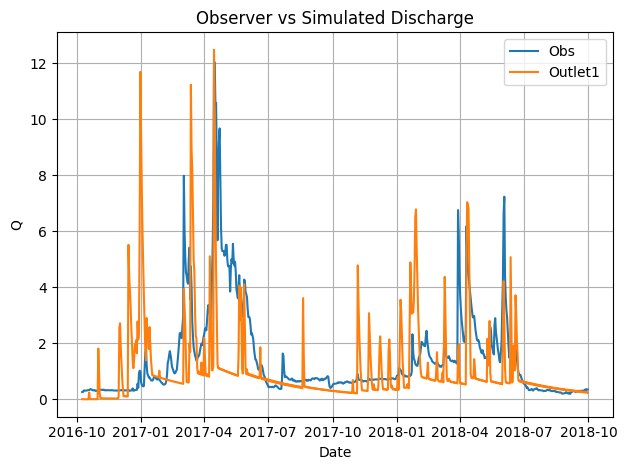

In [4]:
outlet1 = tank.get_basin_def_by_name('Outlet1')
if outlet1 is not None:
    tank.show_discharge(outlet1)

WARNING-MUSKINGUM-01 (R40): violates k, x constraints
WARNING-MUSKINGUM-01 (R90): violates k, x constraints
WARNING-MUSKINGUM-01 (R80): violates k, x constraints
WARNING-MUSKINGUM-01 (R130): violates k, x constraints
WARNING-MUSKINGUM-01 (R120): violates k, x constraints
WARNING-MUSKINGUM-01 (R140): violates k, x constraints
WARNING-MUSKINGUM-01 (R160): violates k, x constraints
Q_tank_0 [0.02, 0.01, 0.01, 0.01]
Q_tank_1 [0.0, 0.0118, 0.009899999999999999, 0.01]
Q_tank_2 [0.0, 0.011564, 0.009819999999999999, 0.009999000000000001]
Q_tank_3 [0.0, 0.01133272, 0.00973924, 0.009997210000000001]
bottom_outlet_flow_tank_0 [0.002, 0.0001, 0.0001]
bottom_outlet_flow_tank_1 [0.0, 0.000118, 9.9e-05]
bottom_outlet_flow_tank_2 [0.0, 0.00011564, 9.819999999999999e-05]


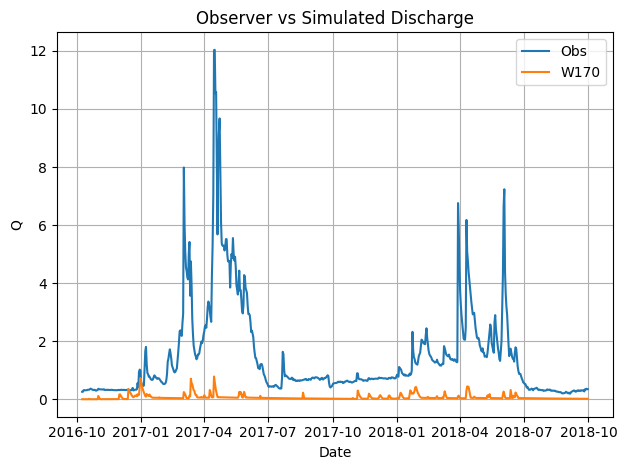

In [5]:
from tj_hyd_tank import SubbasinParams

w170 = tank.get_basin_def_by_name('W170')
if w170 is not None:
    if isinstance(w170, Subbasin):
        tank.reconfig_subbasin_params(
            w170,
            SubbasinParams(
                t0_is=0.02,
                t0_soc_uo=80.0
            )
        )
        print('Q_tank_0', w170.Q_tank_0.tolist())
        print('Q_tank_1', w170.Q_tank_1.tolist())
        print('Q_tank_2', w170.Q_tank_2.tolist())
        print('Q_tank_3', w170.Q_tank_3.tolist())
        print('bottom_outlet_flow_tank_0', w170.bottom_outlet_flow_tank_0.tolist())
        print('bottom_outlet_flow_tank_1', w170.bottom_outlet_flow_tank_1.tolist())
        print('bottom_outlet_flow_tank_2', w170.bottom_outlet_flow_tank_2.tolist())
tank.show_discharge(w170)

WARNING-MUSKINGUM-01 (R40): violates k, x constraints
WARNING-MUSKINGUM-01 (R90): violates k, x constraints
WARNING-MUSKINGUM-01 (R80): violates k, x constraints
WARNING-MUSKINGUM-01 (R130): violates k, x constraints
WARNING-MUSKINGUM-01 (R120): violates k, x constraints
WARNING-MUSKINGUM-01 (R140): violates k, x constraints
WARNING-MUSKINGUM-01 (R160): violates k, x constraints

TJ_HYD_TANK 🍃 🌧 ☔ 💦
FROM: 2016-10-09 00:00:00+00:00
TO: 2016-10-20 00:00:00+00:00
basin_def: W310 W300 W290 W270 W260 W250 W240 W230 W220 W200 W190 W180 W170 Outlet1 J36 J41 J44 J47 J52 J57 J62 R40 R80 R90 R120 R130 R140 R160
root_node: Outlet1



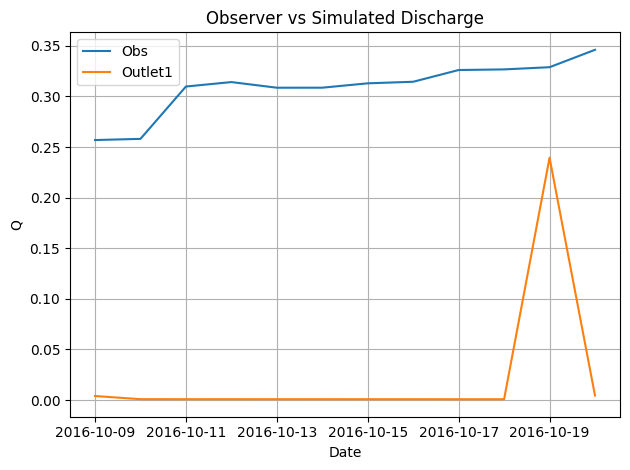

In [6]:
tank.reconfig_tank(
    TANKConfig(
        start_date=pd.to_datetime('09/10/2016', dayfirst=True, utc=True),
        end_date=pd.to_datetime('20/10/2016', dayfirst=True, utc=True)
    )
)
print(tank)
if outlet1 is not None:
    tank.show_discharge(outlet1)